# Import required packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')

# Exercise 1

In [5]:
a_list = [0,1,2,3,4,5]
b_list = a_list[1:4]
print('a before: \n {}'.format(a_list))
print('b before: \n {}'.format(b_list))
b_list[0] = 1000
print('a after: \n {}'.format(a_list))
print('b after: \n {}'.format(b_list))

a before: 
 [0, 1, 2, 3, 4, 5]
b before: 
 [1, 2, 3]
a after: 
 [0, 1, 2, 3, 4, 5]
b after: 
 [1000, 2, 3]


In [6]:
a_array = np.array(a_list)
b_array = a_array[1:4]
print('a before: \n {}'.format(a_array))
print('b before: \n {}'.format(b_array))
b_array[0] = 1000
print('a after: \n {}'.format(a_array))
print('b after: \n {}'.format(b_array))

a before: 
 [0 1 2 3 4 5]
b before: 
 [1 2 3]
a after: 
 [   0 1000    2    3    4    5]
b after: 
 [1000    2    3]


In [8]:
a_array = np.array(a_list)
b_array = np.array(list(a_array))
print('a before: \n {}'.format(a_array))
print('b before: \n {}'.format(b_array))
b_array[0] = 1000
print('a after: \n {}'.format(a_array))
print('b after: \n {}'.format(b_array))

a before: 
 [0 1 2 3 4 5]
b before: 
 [0 1 2 3 4 5]
a after: 
 [0 1 2 3 4 5]
b after: 
 [1000    1    2    3    4    5]


# Exercise 2

In [71]:
n = 3
x = np.arange(1,n)
x.reshape(-1,2)
print('Array x: \n {} \n \n Shape of x: {}'.format(x,x.shape))


Array x: 
 [1 2] 
 
 Shape of x: (2,)


# Exercise 3

In [85]:
a = np.array([0,1,2])
b = np.array([3,0,0])
c = np.dot(a,b)
d = np.linalg.norm(a)*np.linalg.norm(b)
e = np.arccos(c/d)
f = e == np.pi/2
f

True

SyntaxError: invalid syntax (Temp/ipykernel_14364/3043676588.py, line 1)

# Exercise 4 - Linear Regression Exercise

## Simulation of mock data 

Suppose the independent variable $x$ and the response variable $y$ follow a linear relationship, i.e.:

$$ y  = \mathbf{\beta}^\top \cdot \mathbf{x} = \beta_0 + \beta_1 x$$

where

$$
\mathbf{\beta}
=
\begin{bmatrix} 
\beta_0 \\
\beta_1
\end{bmatrix} 
\text{     and,    } 
\mathbf{x}
=
\begin{bmatrix} 
1 \\
x
\end{bmatrix} 
$$


$\beta_0$ is the intercept term and $\beta_1$ is the slope term.

We want to create some mock data $(X,Y)$ of $N=1000$ data points with certain amount of Gaussian noise $\epsilon \sim \mathcal{N} (0,1) $.


Where 

$$
X
=
\begin{bmatrix}
\mathbf{x_1}, 
\mathbf{x_2}, 
\cdots,
\mathbf{x_N}
\end{bmatrix}
=
\begin{bmatrix}
1 & 1& & 1\\
& &\cdots &\\
x_1 & x_2& & x_N
\end{bmatrix}
\text{         and ,     }
Y
=
\begin{bmatrix}
y_1,
y_2,
\cdots,
y_N
\end{bmatrix}
$$




and

$$ y_i = \mathbf{\beta}^\top \cdot \mathbf{x}_i + \epsilon_i = \beta_0 + \beta_1 x_i + \epsilon_i $$ for $i=1 \ldots N$


Let's assume $\beta_0 = 3$ and $\beta_1 = 10$.

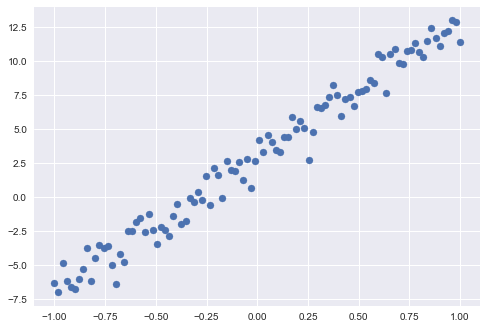

In [372]:
N = 100 #sample size

true_beta = np.array([3,10])
x = np.linspace(-1,1, N)
x1 = np.vstack([np.ones(x.shape), x])

eps = np.random.normal(0,1,N)

y = np.matmul(true_beta, x1) + eps

plt.scatter(x,y)


## Linear Regression

Suppose that we know $x$ and $y$ follow a linear relationship, but we do not know the value of $\mathbf{\beta}$. 
We want to build a linear model $f(\mathbf{x}; \beta)$ and estimate the value of $\mathbf{\beta}$ from data samples $(x_i,y_i)$, so that given any input $\mathbf{x}_i$, we can make a prediction $\hat{y_i}$:


$$ \hat{y_i} = f(\mathbf{x}_i; \beta) = \mathbf{\beta}^\top \cdot \mathbf{x}_i  = \beta_0 + \beta_1 x_i  $$




Define the mean squared error loss function which measure the error between our predictions and the actual values:

$$ l = \frac{1}{N} \sum_{i=1}^{N} (y_i-\hat{y_i})^2 $$

We can estimate the value of $\beta$ by finding the minimizer which minimizes $l$ using the Newton-Raphson algorithm.

$$
\mathbf{\hat{\beta}}
=
\text{argmin}_\beta \   l(\beta)
$$

## Gradient and Hessian

To use the Newton-Raphson algorithm, we need to calculate the gradient and Hessian of the loss function, which are the first order and second order partial derivatives of the loss function respectively.

### The first order partial derivatives of the loss function are:

$$
\begin{align}
\frac{\partial l}{\partial \beta_0} &= -\frac{2}{N} \sum_{i=1}^N (y_i-\hat{y_i}) \\
\frac{\partial l}{\partial \beta_1} &= -\frac{2}{N} \sum_{i=1}^N x_i \cdot (y_i-\hat{y_i}) 
\end{align}
$$

### The gradient of the loss function is: 

$$
\nabla l
=
\begin{bmatrix} 
\frac{\partial l}{\partial \beta_0} \\ 
\frac{\partial l}{\partial \beta_1}
\end{bmatrix}
= 
-2 \cdot
\begin{bmatrix} 
\frac{1}{N} \sum_{i=1}^N (y_i -\hat{y_i}) \\ 
\frac{1}{N} \sum_{i=1}^N x_i \cdot (y_i -\hat{y_i})
\end{bmatrix}
$$

### The second order partial derivatives of the loss function are:

$$ 
\begin{align}
\frac{\partial^2 l}{\partial \beta_0^2} &= 2 \\
\frac{\partial^2 l}{\partial \beta_1^2} &=  \frac{2}{N} \sum_{i=1}^N x_i^2 \\
\frac{\partial^2 l}{\partial \beta_0 \partial \beta_1}  
&=  
\frac{\partial^2 l}{\partial \beta_1 \partial \beta_0}
=
\frac{2}{N} \sum_{i=1}^N x_i 
\end{align}
$$

### The Hessian of the loss function is: 

$$ 
H 
= 
\begin{bmatrix} 
\frac{\partial^2 l}{\partial \beta_0^2} & \frac{\partial^2 l}{\partial \beta_0 \partial \beta_1} \\ \frac{\partial^2 l}{\partial \beta_1 \partial \beta_0} & \frac{\partial^2 l}{\partial \beta_1^2} 
\end{bmatrix} 
= 
2 \cdot
\begin{bmatrix}
1 & \frac{1}{N} \sum_{i=1}^N x_i \\
\frac{1}{N} \sum_{i=1}^N x_i & \frac{1}{N} \sum_{i=1}^N x_i^2
\end{bmatrix}
$$

## Newton-Raphson Algorithm (2nd Order Optimization)








Define the functions for our linear model and the loss function

In [147]:
# Define the function for our linear model
def model(param,x1):
    return np.array(np.matmul(param,x1))

# Define the function for our loss function
def loss_func(param, x1, y):
    yhat = model(param, x1)
    add = 0
    x = y-yhat
    for i in range(len(x)):
        x[i] = x[i]**2
    return np.sum(x)/x.shape[0]

In [312]:
x = np.array([1,2,2.5])
x1 = np.vstack([np.ones(x.shape), x])
beta = np.array([3,10])
y = np.array([3,2,3])
loss_func(beta, x1, y)
print(beta)

[ 3 10]


Newton-Raphson algorithm:

1. Initialize $\mathbf{\beta}$ by sampling from the standard normal distribution  $\mathcal{N} (0,1)$ 



2. At each iteration $k$, update the parameters $\mathbf{\beta}$ by this equation: \
   $$ \mathbf{\beta_{k+1}} = \mathbf{\beta_k} - H^{-1} \mathbf{\nabla} l(\beta_k) $$
     
     
3. Stop the algorithm when $|l(\beta_{k+1}) - l(\beta_k)| < \text{tolerance}$, we can use a small number, i.e. $10^{-7}$, as our tolerance value 


Hint:
1. You can use np.abs(delta) to compute the absolute value of delta


In [ ]:
beta = np.random.normal(0,1,2) #initialize beta
tol = 1e-14 #tolerance
delta = 1 #a variable to store the value for l(\beta_{k+1}) - l(\beta_{k}), initialized to be 1
betalist = [beta]
def hessian(x):
    a = np.mean(x)
    t = []
    for i in x:
        t.append(i**2)
    b = np.mean(np.array(t))
    return np.array([[2,2*a],[2*a,2*b]])
def lossgradient(beta, x1):
    yhat = model(beta, x1)
    o = y-yhat
    a = np.sum(o)/o.shape[0]
    g = np.ones(o.shape)
    for i in range(len(g)):
        g[i] = x1[1][i]*o[i]
    b = np.sum(g)/g.shape[0]
    return np.array([[-2*a],[-2*b]])

In [352]:
beta = np.random.normal(100,1,2) #initialize beta
tol = 1e-14 #tolerance
delta = 1 #a variable to store the value for l(\beta_{k+1}) - l(\beta_{k}), initialized to be 1
betalist = [beta]
while delta > tol:
    print("last beta", betalist[-1])
    print("last loss", lossgradient(betalist[-1], x1))
    delta_beta = np.transpose(np.matmul(np.linalg.inv(hessian(x)), lossgradient(betalist[-1], x1)))
    print("delta_beta", delta_beta)
    new_beta=betalist[-1]-delta_beta
    print("new loss", lossgradient(new_beta, x1))
    betalist.append(new_beta)
    #loss1 = loss_func(np.array([1,2]),np.array([[3,4],[7,8]]),np.array([5,6]))
    loss1 = loss_func(betalist[-1],x1,y)
    loss2 = loss_func(betalist[-2],x1,y)
    delta = np.abs(loss1-loss2)
    print("delta", delta)
    print("betalist", betalist)
    #print("new beta", new_beta)
    print("betalist[-1]",betalist[-1])
    print("x1",x1)
    print("new loss", lossgradient(betalist[-1], x1))
    

last beta [100.71960397 100.88907288]
last loss [[196.00005364]
 [ 60.23303676]]
delta_beta [[98.00002682 90.16903655]]
new loss [[ 1.07007736e-11]
 [-1.07007736e-11]]
delta 83734.62158279272
betalist [array([100.71960397, 100.88907288]), array([[ 2.71957715, 10.72003632]])]
betalist[-1] [[ 2.71957715 10.72003632]]
x1 [[ 1.        1.        1.       ...  1.        1.        1.      ]
 [-1.       -0.997998 -0.995996 ...  0.995996  0.997998  1.      ]]
new loss [[ 1.07007736e-11]
 [-1.07007736e-11]]
last beta [[ 2.71957715 10.72003632]]
last loss [[ 1.07007736e-11]
 [-1.07007736e-11]]
delta_beta [[ 5.35038680e-12 -1.60190902e-11]]
new loss [[-1.06901155e-08]
 [ 1.06901155e-08]]
delta 1.4551915228366852e-11
betalist [array([100.71960397, 100.88907288]), array([[ 2.71957715, 10.72003632]]), array([[ 2.71957715, 10.72003632]])]
betalist[-1] [[ 2.71957715 10.72003632]]
x1 [[ 1.        1.        1.       ...  1.        1.        1.      ]
 [-1.       -0.997998 -0.995996 ...  0.995996  0.99799

## Visualizing the result

The estimated value for beta is: [[ 3.1276983  10.21073058]]
The true value for beta is: [ 3 10]


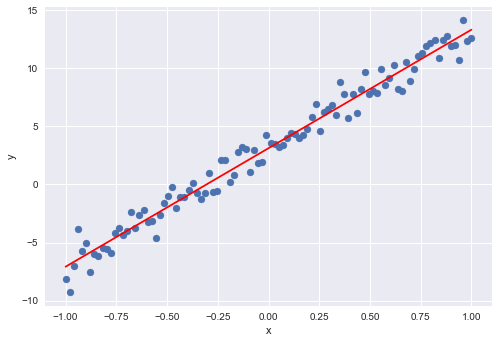

In [331]:
print('The estimated value for beta is:', new_beta)
print('The true value for beta is:', true_beta)

y_pred = np.matmul(betalist[2][0],x1)

plt.plot(x, y_pred, 'r')
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

## Gradient Descent Algorithm (1st Order Optimization) [Optional Exercise]

Gradient descent algorithm:


1. Initialize $\mathbf{\beta}$ by sampling from the standard normal distribution  $\mathcal{N} (0,1)$ 



2. At each iteration $k$, update the parameters $\mathbf{\beta}$ by this equation: \
   $$ \mathbf{\beta_{k+1}} = \mathbf{\beta_k} - \alpha \mathbf{\nabla} l(\beta_k) $$
   where $\alpha \sim 10^{-1}$ is the step size



3. Stop the algorithm when $|l(\beta_{k+1}) - l(\beta_k)| < \text{tolerance}$, we can use a small number, i.e. $10^{-7}$, as our tolerance value 



In [373]:
beta = np.random.normal(0,1,2) #initialize beta
alpha = 0.001
tol = 1e-7 #tolerance
delta = 1 #a variable to store the value for l(\beta_{k+1}) - l(\beta_{k}), initialized to be 1
betalist = [beta]
while delta > tol:
    print("last beta", betalist[-1])
    delta_beta = np.transpose(alpha*lossgradient(betalist[-1], x1))
    print("test1", lossgradient(betalist[-1], x1))
    print("test2", alpha*lossgradient(betalist[-1], x1))
    print("delta_beta", delta_beta)
    new_beta=betalist[-1]-delta_beta
    print("new_beta",new_beta)
    betalist.append(new_beta)
    #loss1 = loss_func(np.array([1,2]),np.array([[3,4],[7,8]]),np.array([5,6]))
    loss1 = loss_func(betalist[-1],x1,y)
    loss2 = loss_func(betalist[-2],x1,y)
    delta = np.abs(loss1-loss2)
    print("last loss", loss2)
    print("new loss", loss1)
    print("delta", delta)
    print("betalist", betalist)
    #print("new beta", new_beta)

last beta [ 0.08534986 -0.71534366]
test1 [[-5.84595508]
 [-7.24233579]]
test2 [[-0.00584596]
 [-0.00724234]]
delta_beta [[-0.00584596 -0.00724234]]
new_beta [[ 0.09119582 -0.70810133]]
last loss 47.92882940811228
new loss 4784.225480183455
delta 4736.296650775343
betalist [array([ 0.08534986, -0.71534366]), array([[ 0.09119582, -0.70810133]])]
last beta [[ 0.09119582 -0.70810133]]
test1 [[-583.42631685]
 [ 583.42631685]]
test2 [[-0.58342632]
 [ 0.58342632]]
delta_beta [[-0.58342632  0.58342632]]
new_beta [[ 0.67462213 -1.29152764]]
last loss 4784.225480183455
new loss 4911.702812510296
delta 127.47733232684095
betalist [array([ 0.08534986, -0.71534366]), array([[ 0.09119582, -0.70810133]]), array([[ 0.67462213, -1.29152764]])]
last beta [[ 0.67462213 -1.29152764]]
test1 [[-466.74105348]
 [ 466.74105348]]
test2 [[-0.46674105]
 [ 0.46674105]]
delta_beta [[-0.46674105  0.46674105]]
new_beta [[ 1.14136319 -1.7582687 ]]
last loss 4911.702812510296
new loss 5079.368913204695
delta 167.66610

delta 0.011997681495813595
betalist [array([ 0.08534986, -0.71534366]), array([[ 0.09119582, -0.70810133]]), array([[ 0.67462213, -1.29152764]]), array([[ 1.14136319, -1.7582687 ]]), array([[ 1.51475603, -2.13166154]]), array([[ 1.8134703 , -2.43037581]]), array([[ 2.05244172, -2.66934723]]), array([[ 2.24361886, -2.86052437]]), array([[ 2.39656057, -3.01346608]]), array([[ 2.51891393, -3.13581944]]), array([[ 2.61679663, -3.23370214]]), array([[ 2.69510278, -3.31200829]]), array([[ 2.75774771, -3.37465322]]), array([[ 2.80786364, -3.42476916]]), array([[ 2.8479564 , -3.46486191]]), array([[ 2.8800306 , -3.49693611]]), array([[ 2.90568996, -3.52259547]]), array([[ 2.92621745, -3.54312296]]), array([[ 2.94263944, -3.55954495]]), array([[ 2.95577703, -3.57268254]]), array([[ 2.9662871 , -3.58319261]]), array([[ 2.97469516, -3.59160067]]), array([[ 2.98142161, -3.59832712]]), array([[ 2.98680277, -3.60370828]]), array([[ 2.9911077 , -3.60801321]]), array([[ 2.99455164, -3.61145715]]), arr

 [ 1.87505989e-07]]
delta_beta [[-1.87505989e-07  1.87505989e-07]]
new_beta [[ 3.00832665 -3.62523216]]
last loss 6333.892316625202
new loss 6333.892489532914
delta 0.00017290771211264655
betalist [array([ 0.08534986, -0.71534366]), array([[ 0.09119582, -0.70810133]]), array([[ 0.67462213, -1.29152764]]), array([[ 1.14136319, -1.7582687 ]]), array([[ 1.51475603, -2.13166154]]), array([[ 1.8134703 , -2.43037581]]), array([[ 2.05244172, -2.66934723]]), array([[ 2.24361886, -2.86052437]]), array([[ 2.39656057, -3.01346608]]), array([[ 2.51891393, -3.13581944]]), array([[ 2.61679663, -3.23370214]]), array([[ 2.69510278, -3.31200829]]), array([[ 2.75774771, -3.37465322]]), array([[ 2.80786364, -3.42476916]]), array([[ 2.8479564 , -3.46486191]]), array([[ 2.8800306 , -3.49693611]]), array([[ 2.90568996, -3.52259547]]), array([[ 2.92621745, -3.54312296]]), array([[ 2.94263944, -3.55954495]]), array([[ 2.95577703, -3.57268254]]), array([[ 2.9662871 , -3.58319261]]), array([[ 2.97469516, -3.591

betalist [array([ 0.08534986, -0.71534366]), array([[ 0.09119582, -0.70810133]]), array([[ 0.67462213, -1.29152764]]), array([[ 1.14136319, -1.7582687 ]]), array([[ 1.51475603, -2.13166154]]), array([[ 1.8134703 , -2.43037581]]), array([[ 2.05244172, -2.66934723]]), array([[ 2.24361886, -2.86052437]]), array([[ 2.39656057, -3.01346608]]), array([[ 2.51891393, -3.13581944]]), array([[ 2.61679663, -3.23370214]]), array([[ 2.69510278, -3.31200829]]), array([[ 2.75774771, -3.37465322]]), array([[ 2.80786364, -3.42476916]]), array([[ 2.8479564 , -3.46486191]]), array([[ 2.8800306 , -3.49693611]]), array([[ 2.90568996, -3.52259547]]), array([[ 2.92621745, -3.54312296]]), array([[ 2.94263944, -3.55954495]]), array([[ 2.95577703, -3.57268254]]), array([[ 2.9662871 , -3.58319261]]), array([[ 2.97469516, -3.59160067]]), array([[ 2.98142161, -3.59832712]]), array([[ 2.98680277, -3.60370828]]), array([[ 2.9911077 , -3.60801321]]), array([[ 2.99455164, -3.61145715]]), array([[ 2.99730679, -3.614212

## Visualizing the result

The estimated value for beta is: [-0.25322183  0.15033645]
The true value for beta is: [ 3 10]


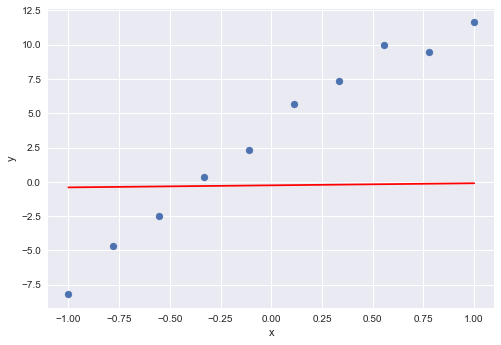

In [253]:
print('The estimated value for beta is:', beta)
print('The true value for beta is:', true_beta)

y_pred = np.matmul(beta,x1)

plt.plot(x, y_pred, 'r')
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [252]:
import datetime
import matplotlib.pyplot as plt
from datetime import time
import time as tm
from IPython.display import clear_output
from IPython.display import Audio
sound_file = 'Rss/sound effect.wav'
Time = 1
Time = Time * 60
while Time > -1:
    Time = round(Time,2)
    Second = Time % 60
    Min = Time - Second
    Min = Min/60
    Second = round(Second)
    Min = round(Min)
    if len(str(Second)) == 1:
        time = str(Min) + ':' + '0'+ str(Second)
    else:
        time = str(Min) + ':' + str(Second)
    plt.text(0.3, 0.5, time,size = 50,fontfamily = 'cursive',c = 'blue')
    ax = plt.gca()
    ax.set_facecolor('xkcd:aquamarine')
    plt.show()
    Time += -1
    tm.sleep(1)
    clear_output(wait=True)

(<function ndarray.transpose>,
 array([[-3.4077746 ],
        [-9.79028605]]))